# DAY-AHEAD BASELINE MODEL

## 2025 ENTSO-E data BZN|NL

Residual load x price correlation: day-ahead prices bheaviour as a function of residual load

In [8]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

repo_root = Path("..").resolve()
sys.path.append(str(repo_root))


#Load 2025 ENTSO-E data
from Source.load_data import load_2025

df_market = load_2025()
df_market = df_market.T.drop_duplicates().T

mtu = df_market['MTU (CET/CEST)'].iloc[:,0]
df_market['Time'] = mtu.str.split(' - ').str[0]
df_market['Time'] = df_market['Time'].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()
df_market['Time'] = pd.to_datetime(df_market['Time'], dayfirst=True)

df_market['Hour'] = df_market['Time'].dt.hour
df_market['Day'] = df_market['Time'].dt.day
df_market['Month'] = df_market['Time'].dt.month


df_market.tail()

,MTU (CET/CEST),Area,Sequence,Day-ahead Price (EUR/MWh),Total Generation Forecast (MW),Total Actual Generation (MW),MTU (CET/CEST),Actual Total Load (MW),Day-ahead Total Load Forecast (MW),Day-ahead offshore wind (MW),Actual offshore wind (MW),Day-ahead onshore wind (MW),Actual onshore wind (MW),Day-ahead solar (MW),Actual solar (MW),Time,Hour,Day,Month
35035,31/12/2025 22:45:00 - 31/12/2025 23:00:00,BZN|NL,Without Sequence,73.76,10688.22,8141.58,31/12/2025 22:45 - 31/12/2025 23:00,10602.18,11600.78,1057,4027.5,2109,808.08,0,0.0,2025-12-31 22:45:00,22,31,12
35036,31/12/2025 23:00:00 - 31/12/2025 23:15:00,BZN|NL,Without Sequence,87.16,10029.89,8164.07,31/12/2025 23:00 - 31/12/2025 23:15,10617.95,11397.23,1088,4076.18,2155,810.64,0,0.0,2025-12-31 23:00:00,23,31,12
35037,31/12/2025 23:15:00 - 31/12/2025 23:30:00,BZN|NL,Without Sequence,74.27,9800.48,8158.97,31/12/2025 23:15 - 31/12/2025 23:30,10665.56,11343.97,1116,4116.6,2204,794.55,0,0.0,2025-12-31 23:15:00,23,31,12
35038,31/12/2025 23:30:00 - 31/12/2025 23:45:00,BZN|NL,Without Sequence,67.6,9716.1,8056.36,31/12/2025 23:30 - 31/12/2025 23:45,10590.58,11094.52,1140,4069.39,2254,790.05,0,0.0,2025-12-31 23:30:00,23,31,12
35039,31/12/2025 23:45:00 - 01/01/2026 00:00:00,BZN|NL,Without Sequence,67.6,9539.61,8044.8,31/12/2025 23:45 - 01/01/2026 00:00,10433.0,10680.22,1164,4209.28,2303,856.55,0,0.0,2025-12-31 23:45:00,23,31,12


In [16]:
df_market.tail()

,MTU (CET/CEST),Area,Sequence,Day-ahead Price (EUR/MWh),Total Generation Forecast (MW),Total Actual Generation (MW),MTU (CET/CEST),Actual Total Load (MW),Day-ahead Total Load Forecast (MW),Day-ahead offshore wind (MW),Actual offshore wind (MW),Day-ahead onshore wind (MW),Actual onshore wind (MW),Day-ahead solar (MW),Actual solar (MW),Time,Hour,Day,Month
35035,31/12/2025 22:45:00 - 31/12/2025 23:00:00,BZN|NL,Without Sequence,73.76,10688.22,8141.58,31/12/2025 22:45 - 31/12/2025 23:00,10602.18,11600.78,1057,4027.5,2109,808.08,0,0.0,2025-12-31 22:45:00,22,31,12
35036,31/12/2025 23:00:00 - 31/12/2025 23:15:00,BZN|NL,Without Sequence,87.16,10029.89,8164.07,31/12/2025 23:00 - 31/12/2025 23:15,10617.95,11397.23,1088,4076.18,2155,810.64,0,0.0,2025-12-31 23:00:00,23,31,12
35037,31/12/2025 23:15:00 - 31/12/2025 23:30:00,BZN|NL,Without Sequence,74.27,9800.48,8158.97,31/12/2025 23:15 - 31/12/2025 23:30,10665.56,11343.97,1116,4116.6,2204,794.55,0,0.0,2025-12-31 23:15:00,23,31,12
35038,31/12/2025 23:30:00 - 31/12/2025 23:45:00,BZN|NL,Without Sequence,67.6,9716.1,8056.36,31/12/2025 23:30 - 31/12/2025 23:45,10590.58,11094.52,1140,4069.39,2254,790.05,0,0.0,2025-12-31 23:30:00,23,31,12
35039,31/12/2025 23:45:00 - 01/01/2026 00:00:00,BZN|NL,Without Sequence,67.6,9539.61,8044.8,31/12/2025 23:45 - 01/01/2026 00:00,10433.0,10680.22,1164,4209.28,2303,856.55,0,0.0,2025-12-31 23:45:00,23,31,12


Pearsons correlation> actual: 0.511
Pearsons correlation> day-ahead: 0.760


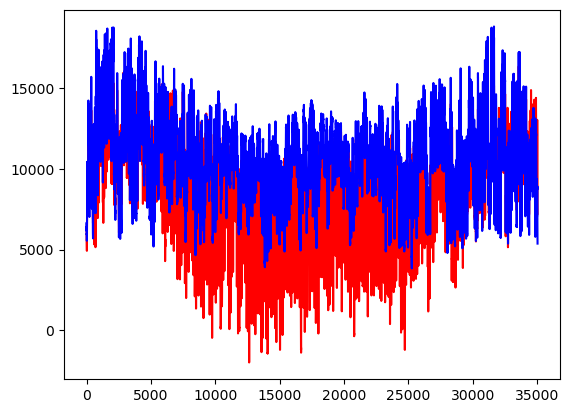

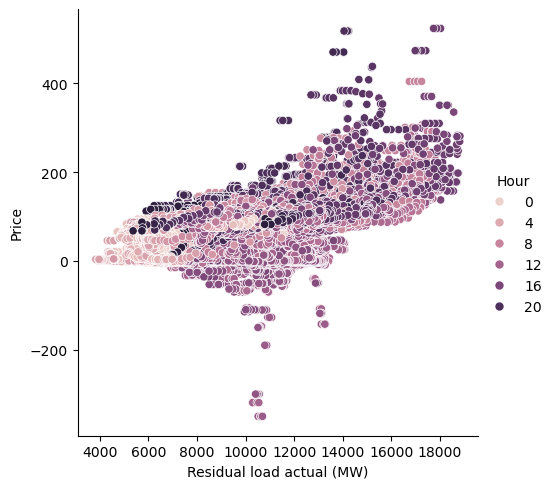

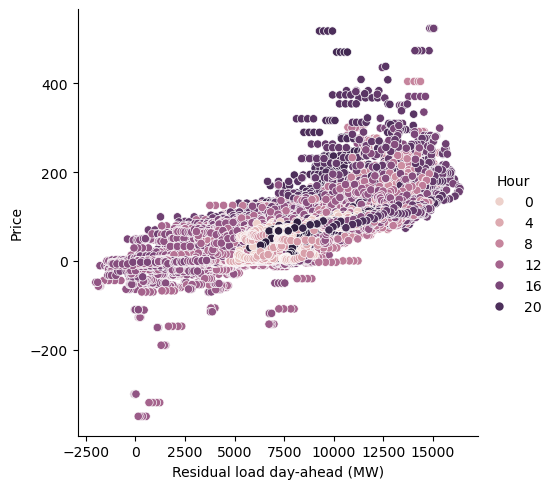

In [9]:
#Indexing
x = df_market.index

#Residual load: Total Load - Generation from Renewables

residual_load_da = df_market['Day-ahead Total Load Forecast (MW)'] - df_market['Day-ahead offshore wind (MW)'] - df_market['Day-ahead onshore wind (MW)'] - df_market['Day-ahead solar (MW)']
residual_load_actual = df_market['Actual Total Load (MW)'] - df_market['Actual offshore wind (MW)'] - df_market['Actual onshore wind (MW)'] - df_market['Actual solar (MW)']


plt.plot(x,residual_load_da,'r', residual_load_actual, 'b')

price_load = pd.DataFrame({'Residual load actual (MW)':residual_load_actual,'Residual load day-ahead (MW)':residual_load_da,'Price': df_market['Day-ahead Price (EUR/MWh)']})
price_load['Month'] = df_market['Month']
price_load['Hour'] = df_market['Hour']

sns.relplot(x ="Residual load actual (MW)", y ="Price", hue = 'Hour',
            data = price_load)
corr_actual, _ = pearsonr(residual_load_actual.to_numpy(dtype=float), df_market['Day-ahead Price (EUR/MWh)'].to_numpy(dtype=float))
print('Pearsons correlation> actual: %.3f' % corr_actual)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Hour',
            data = price_load)
corr_da, _ = pearsonr(residual_load_da.to_numpy(dtype=float), df_market['Day-ahead Price (EUR/MWh)'].to_numpy(dtype=float))
print('Pearsons correlation> day-ahead: %.3f' % corr_da)

## Hourly sensitivity of price to residual load

Linear regression

Note: missing gas price component

In [10]:
print(price_load.head())

dtypes = price_load[[
    "Price",
    "Residual load day-ahead (MW)"
]].dtypes

dtypes

price_load["Price"] = pd.to_numeric(price_load["Price"], errors="coerce")
price_load["Residual load day-ahead (MW)"] = pd.to_numeric(
    price_load["Residual load day-ahead (MW)"],
    errors="coerce"
)

dtypes = price_load[[
    "Price",
    "Residual load day-ahead (MW)"
]].dtypes

dtypes

  Residual load actual (MW) Residual load day-ahead (MW)  Price  Month  Hour
0                   6217.86                      6199.38  13.62      1     0
1                   6143.04                       6151.9  13.62      1     0
2                   6408.02                       6004.9  13.62      1     0
3                   6269.17                      5863.26  13.62      1     0
4                   6676.54                      5754.04   6.24      1     1


Price                           float64
Residual load day-ahead (MW)    float64
dtype: object

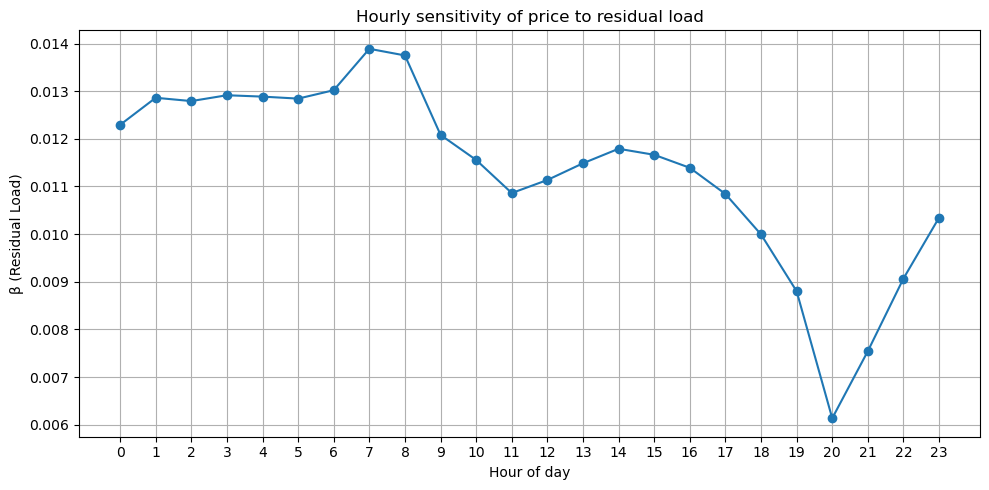

In [11]:
import statsmodels.api as sm

hourly_mean_price = (
    price_load
    .groupby("Hour")["Price"]
    .mean()
)

models_rl = {}
coefficients = []

for hour in range(24):
    d = price_load[price_load["Hour"] == hour]
    
    X = sm.add_constant(d["Residual load day-ahead (MW)"])
    y = d["Price"]
    
    model = sm.OLS(y, X).fit()
    models_rl[hour] = model
    
    coefficients.append({
        "Hour": hour,
        "alpha": model.params["const"],
        "beta_residual_load": model.params["Residual load day-ahead (MW)"],
        "r2": model.rsquared
    })

coef_df = pd.DataFrame(coefficients)
coef_df_sorted = coef_df.sort_values("Hour")

plt.figure(figsize=(10, 5))
plt.plot(
    coef_df_sorted["Hour"],
    coef_df_sorted["beta_residual_load"],
    marker="o"
)

plt.xlabel("Hour of day")
plt.ylabel("β (Residual Load)")
plt.title("Hourly sensitivity of price to residual load")

plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

## Hour-dependent regression

Time blocks:

Morning = 7 am to 12 pm

Afternoon = 13 pm to 8 pm

Night = 9 pm to 6 am 

Pearsons correlation> morning day-ahead: 0.775
Pearsons correlation> afternoon day-ahead: 0.779
Pearsons correlation> night day-ahead: 0.709


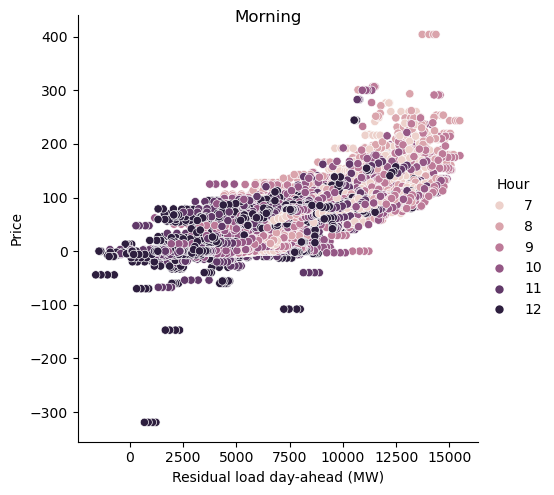

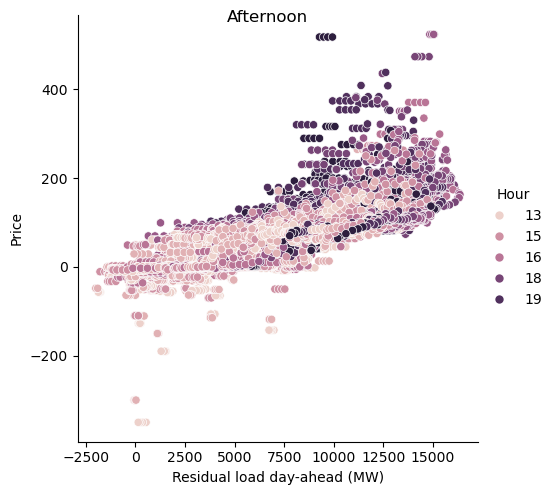

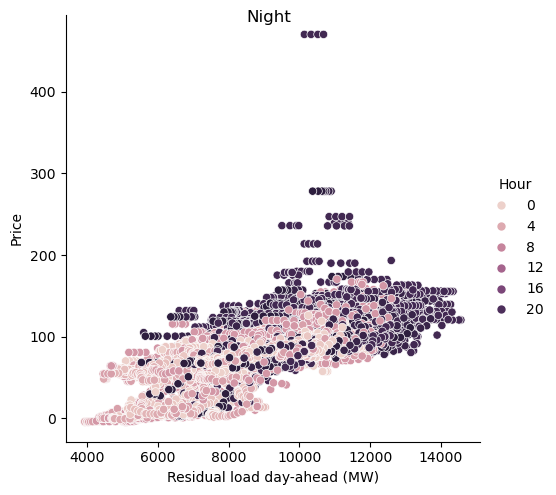

In [12]:
morning_price_load = price_load[(price_load['Hour']>=7) & (price_load['Hour']<=12)]
afternoon_price_load = price_load[(price_load['Hour']>=13) & (price_load['Hour']<=20)]
night_price_load = price_load[((price_load['Hour']>=21) & (price_load['Hour']<=24)) | ((price_load['Hour']>=0) & (price_load['Hour']<=6))]

morning_price_load.head()

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Hour',
            data = morning_price_load).figure.suptitle('Morning')
corr_da, _ = pearsonr(morning_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), morning_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> morning day-ahead: %.3f' % corr_da)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Hour',
            data = afternoon_price_load).figure.suptitle('Afternoon')
corr_da, _ = pearsonr(afternoon_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), afternoon_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> afternoon day-ahead: %.3f' % corr_da)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Hour',
            data = night_price_load).figure.suptitle('Night')
corr_da, _ = pearsonr(night_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), night_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> night day-ahead: %.3f' % corr_da)


# Season-dependent regression

Time blocks:

Spring = start of March to end of May

Summer = start of June to end of August

Autumn = start of September to 6 end of November 

Winter = start of December to end of February

Pearsons correlation> spring day-ahead: 0.799
Pearsons correlation> summer day-ahead: 0.750
Pearsons correlation> autumn day-ahead: 0.747
Pearsons correlation> winter day-ahead: 0.671


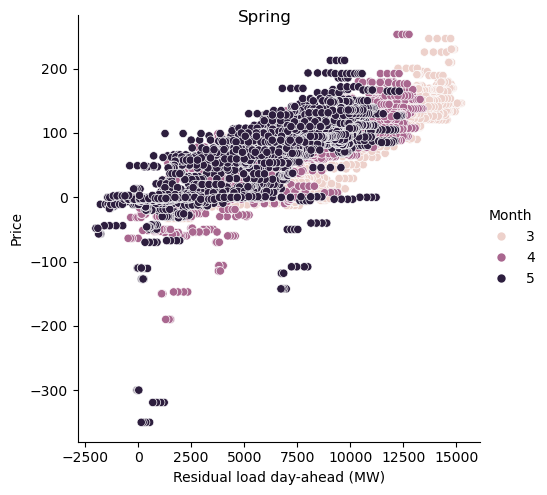

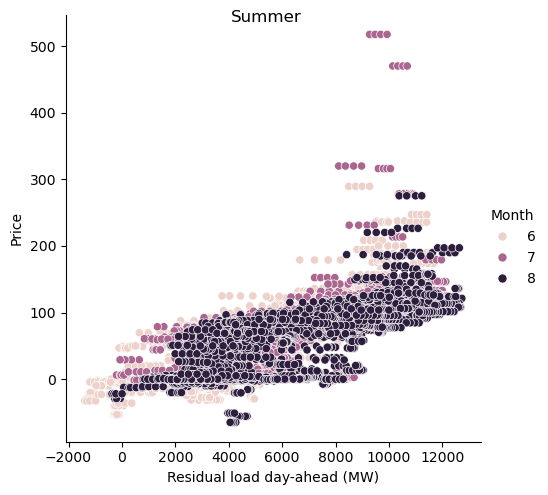

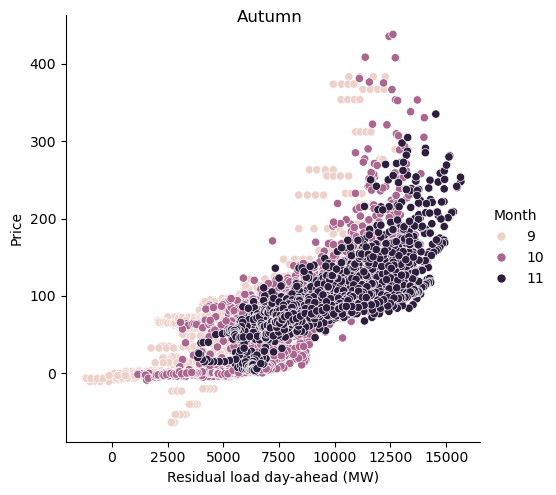

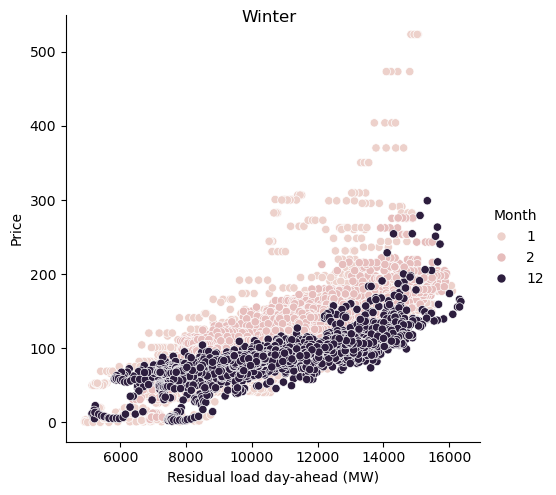

In [13]:
spring_price_load = price_load[(price_load['Month']>=3) & (price_load['Month']<=5)]
summer_price_load = price_load[(price_load['Month']>=6) & (price_load['Month']<=8)]
autumn_price_load = price_load[(price_load['Month']>=9) & (price_load['Month']<=11)]
winter_price_load = price_load[(price_load['Month']==12) | ((price_load['Month']>=1) & (price_load['Month']<=2))]


sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Month',
            data = spring_price_load).figure.suptitle('Spring')
corr_da, _ = pearsonr(spring_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), spring_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> spring day-ahead: %.3f' % corr_da)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Month',
            data = summer_price_load).figure.suptitle('Summer')
corr_da, _ = pearsonr(summer_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), summer_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> summer day-ahead: %.3f' % corr_da)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Month',
            data = autumn_price_load).figure.suptitle('Autumn')
corr_da, _ = pearsonr(autumn_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), autumn_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> autumn day-ahead: %.3f' % corr_da)

sns.relplot(x ="Residual load day-ahead (MW)", y ="Price", hue = 'Month',
            data = winter_price_load).figure.suptitle('Winter')
corr_da, _ = pearsonr(winter_price_load['Residual load day-ahead (MW)'].to_numpy(dtype=float), winter_price_load['Price'].to_numpy(dtype=float))
print('Pearsons correlation> winter day-ahead: %.3f' % corr_da)

In [14]:
#Saves data to progress to the next models

%store price_load
%store morning_price_load
%store afternoon_price_load
%store night_price_load
%store spring_price_load
%store summer_price_load
%store autumn_price_load
%store winter_price_load




Stored 'price_load' (DataFrame)
Stored 'morning_price_load' (DataFrame)
Stored 'afternoon_price_load' (DataFrame)
Stored 'night_price_load' (DataFrame)
Stored 'spring_price_load' (DataFrame)
Stored 'summer_price_load' (DataFrame)
Stored 'autumn_price_load' (DataFrame)
Stored 'winter_price_load' (DataFrame)
